# Scenario 1: 2-headed Coin

In [1]:
from montecarlo import Die, Game, Analyzer

In [2]:
Faces = ['H','T']
Fair = Die(Faces)
Unfair = Die(Faces)
Unfair.change_weight('H',5)

Play a game of 1,000 flips with three coins with all fair dice. 

In [3]:
Game = Game([Fair,Fair,Fair])
Game.play(1000)
Analysis = Analyzer(Game)
Fair_Jackpot = Analysis.jackpot()/1000
print(Fair_Jackpot)

0.249


Play a game of 1,000 flips with three coins with two unfair dice and one fair die

In [4]:
from montecarlo import Game
Unfair_Game = Game([Unfair,Fair,Unfair])
Unfair_Game.play(1000)
Analysis = Analyzer(Unfair_Game)
Unfair_Jackpot = Analysis.jackpot()/1000
print(Unfair_Jackpot)

0.347


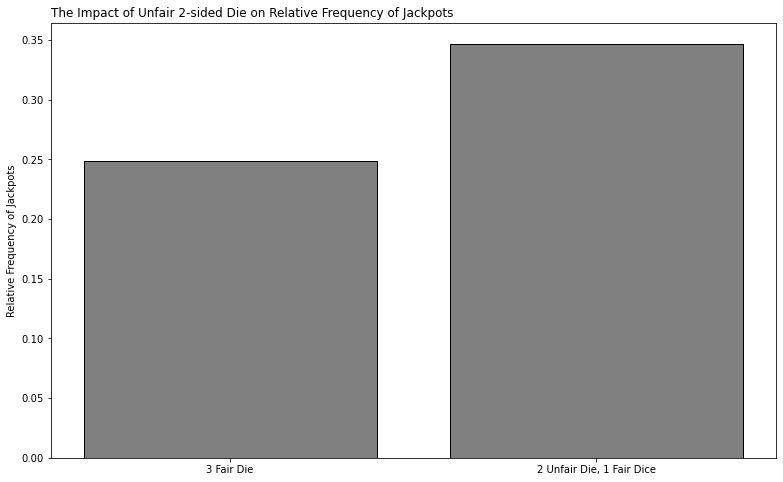

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.bar(['3 Fair Die','2 Unfair Die, 1 Fair Dice'],[Fair_Jackpot, Unfair_Jackpot],color='gray',edgecolor='black')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('The Impact of Unfair 2-sided Die on Relative Frequency of Jackpots',loc='left')
plt.show()

# Scenario 2: 6-sided Die

In [6]:
from montecarlo import Die, Game, Analyzer

In [7]:
Faces = [1,2,3,4,5,6]
Die1 = Die(Faces)
Die1.change_weight(6,5)
Die2 = Die(Faces)
Die2.change_weight(1,5)
Die = Die(Faces)

In [8]:
Fair_Game = Game([Die, Die, Die, Die, Die])
Fair_Game.play(10000)
Analysis = Analyzer(Fair_Game)
Fair_Jackpots = Analysis.jackpot()/10000
Analysis.Combo()
Fair_Combo = Analysis.combo[:10]

In [9]:
from montecarlo import Game
Unfair_Game = Game([Die1,Die1,Die2,Die,Die])
Unfair_Game.play(10000)
Analysis = Analyzer(Unfair_Game)
Unfair_Jackpots = Analysis.jackpot()/10000
Analysis.Combo()
Unfair_Combo = Analysis.combo[:10]


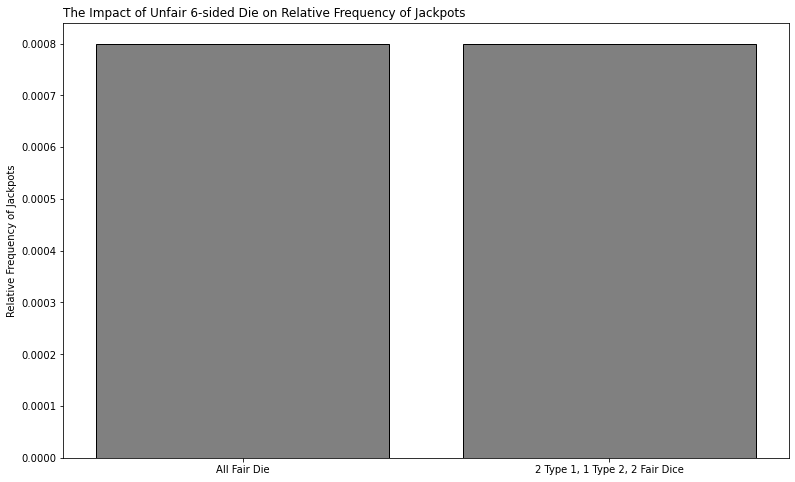

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,8))
plt.bar(['All Fair Die','2 Type 1, 1 Type 2, 2 Fair Dice'],[Fair_Jackpots, Unfair_Jackpots],color='gray',edgecolor='black')
plt.ylabel('Relative Frequency of Jackpots')
plt.title('The Impact of Unfair 6-sided Die on Relative Frequency of Jackpots',loc='left')
plt.show()


# Scenario 3: Roman Alphabet

In [11]:
import pandas as pd
import numpy as np
from montecarlo import Die, Game, Analyzer

Alphabet = pd.read_csv('roman_alphabet.txt',delimiter='\t',header=None,names=['Letter','Weight'])
Alphabet['Letter'] = Alphabet['Letter'].astype('str')

In [12]:
Die = Die(Alphabet['Letter'].tolist())

for i in range(len(Alphabet)):
    Die.change_weight(Alphabet['Letter'].iloc[i], Alphabet['Weight'].iloc[i])

In [13]:
Game = Game([Die, Die, Die, Die, Die])
Result_list = []
for i in range(10):
    rand_list = np.random.randint(1000,size=10)
    Game.play(1000)
    Result_list.append(Game.show().iloc[rand_list])
    

In [14]:
Result_list

[     Die #1 Die #2 Die #3 Die #4 Die #5
 Roll                                   
 755       L      T      C      R      E
 672       S      N      T      A      Q
 877       E      W      C      A      U
 573       A      C      O      Y      T
 529       O      A      T      B      U
 598       A      M      A      R      M
 848       C      I      O      U      E
 299       O      A      C      N      R
 759       L      B      A      E      D
 515       E      U      B      L      R,
      Die #1 Die #2 Die #3 Die #4 Die #5
 Roll                                   
 915       A      C      A      E      G
 199       I      S      T      C      R
 82        R      A      E      H      D
 204       U      A      F      E      H
 490       G      W      R      T      H
 796       B      S      N      E      G
 340       I      T      I      E      N
 790       W      B      T      M      E
 382       O      S      T      G      E
 464       S      E      N      A      O,
      Die #1 D